In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_parquet('../data/data.parquet')

In [ ]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.9,3.50,0.5,6.70,0.0,1.0,33.60,2.5,0.00
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.6,3.50,0.5,3.00,0.0,1.0,23.60,2.5,0.00
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.8,7.75,0.5,10.00,0.0,1.0,60.05,0.0,1.75
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.4,1.00,0.5,8.88,0.0,1.0,53.28,2.5,0.00
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.3,1.00,0.5,0.72,0.0,1.0,15.02,2.5,0.00


In [ ]:
location_data = gpd.read_file('/Users/alex/Documents/2. NYU/DS-1007 Programming for Data Science/Project/DS1007_FinalProject/data/geospatial/taxi_zones.shp')
location_data.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [ ]:
location_data.isnull().sum()

OBJECTID      0
Shape_Leng    0
Shape_Area    0
zone          0
LocationID    0
borough       0
geometry      0
dtype: int64

In [ ]:
location_data['zone'].nunique()

260

In [ ]:
location_data.shape

(263, 7)

In [ ]:
merged_data = pd.merge(data, location_data, how='left', left_on='PULocationID', right_on="LocationID")

In [ ]:
merged_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,Airport_fee,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,...,33.60,2.5,0.00,140.0,0.047584,0.000114,Lenox Hill East,140.0,Manhattan,"POLYGON ((995735.062 215619.835, 995670.105 21..."
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,...,23.60,2.5,0.00,50.0,0.055748,0.000173,Clinton West,50.0,Manhattan,"POLYGON ((985170.372 221087.389, 985817.17 220..."
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,...,60.05,0.0,1.75,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,...,53.28,2.5,0.00,100.0,0.024813,0.000037,Garment District,100.0,Manhattan,"POLYGON ((987770.527 212686.678, 987638.873 21..."
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,...,15.02,2.5,0.00,137.0,0.046108,0.000116,Kips Bay,137.0,Manhattan,"POLYGON ((991954.728 209026.462, 991949.076 20..."


In [ ]:
# Check for missing values in the merged data
missing_locations = merged_data[merged_data['zone'].isnull()]
print(f"Number of rides with missing location info: {len(missing_locations)}")

Number of rides with missing location info: 387339


In [ ]:
# Drop rows with missing location data if necessary
merged_data = merged_data.dropna(subset=['zone'])

In [ ]:
pickup_analysis = merged_data.groupby('zone').agg({
    'tpep_pickup_datetime': 'count',  # Total pickups
    'fare_amount': 'mean'  # Average fare
}).reset_index()

# Rename columns for clarity
pickup_analysis.rename(columns={'tpep_pickup_datetime': 'total_pickups', 'fare_amount': 'avg_fare'}, inplace=True)

# Sort by total pickups
pickup_analysis = pickup_analysis.sort_values(by='total_pickups', ascending=False)
print(pickup_analysis.head(10))

                             zone  total_pickups   avg_fare
122                   JFK Airport        1992304  61.080875
232         Upper East Side South        1791795  13.009022
155                Midtown Center        1766041  16.473684
231         Upper East Side North        1596584  13.584188
156                  Midtown East        1353753  15.879083
132             LaGuardia Airport        1305259  42.688226
181  Penn Station/Madison Sq West        1305113  16.984974
225     Times Sq/Theatre District        1270680  19.279029
136           Lincoln Square East        1256024  14.334973
164                   Murray Hill        1131673  15.845585


/var/folders/w1/b1w4nxzd69q4q3mzdg9170wm0000gn/T/ipykernel_14515/1598181558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pickups, x='total_pickups', y='zone', palette='viridis')


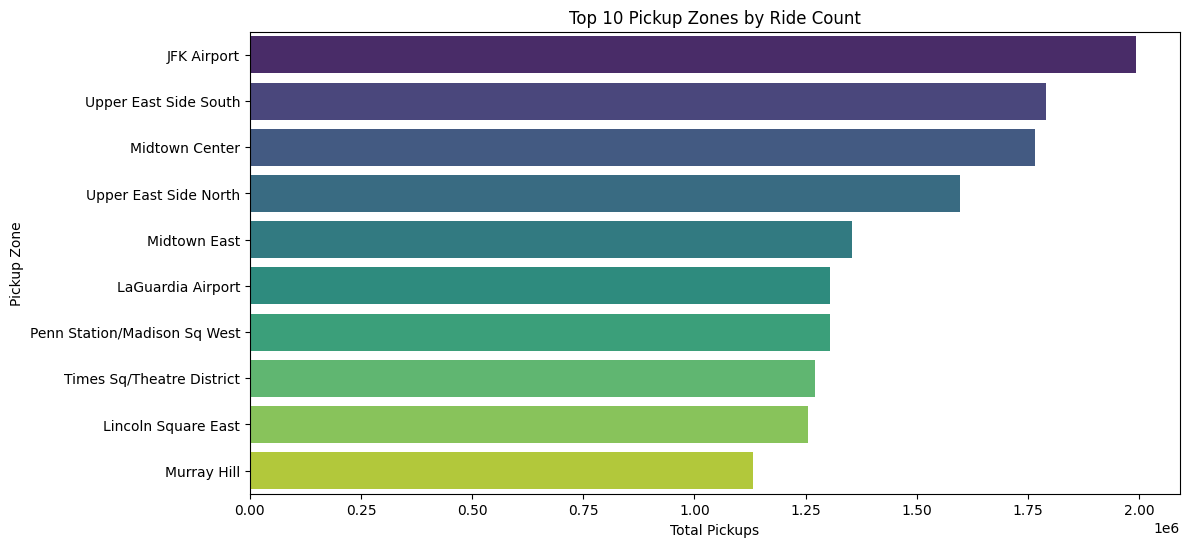

In [ ]:
# Plot top 10 pickup zones
top_pickups = pickup_analysis.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pickups, x='total_pickups', y='zone', palette='viridis')
plt.xlabel('Total Pickups')
plt.ylabel('Pickup Zone')
plt.title('Top 10 Pickup Zones by Ride Count')
plt.show()

                                  zone  total_pickups   avg_fare
167                     Newark Airport           5107  87.458330
103                   Great Kills Park              1  70.990000
80   Eltingville/Annadale/Prince's Bay             15  67.312667
199                  Rossville/Woodrow             19  66.252632
2                        Arden Heights            387  64.172636
166             New Dorp/Midland Beach             31  63.338065
122                        JFK Airport        1992304  61.080875
246                        Westerleigh             77  60.862857
209           South Beach/Dongan Hills            194  59.549485
7                         Baisley Park          12183  59.150556


/var/folders/w1/b1w4nxzd69q4q3mzdg9170wm0000gn/T/ipykernel_14515/2640768369.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fare_pickups_spots, x='avg_fare', y='zone', palette='viridis')


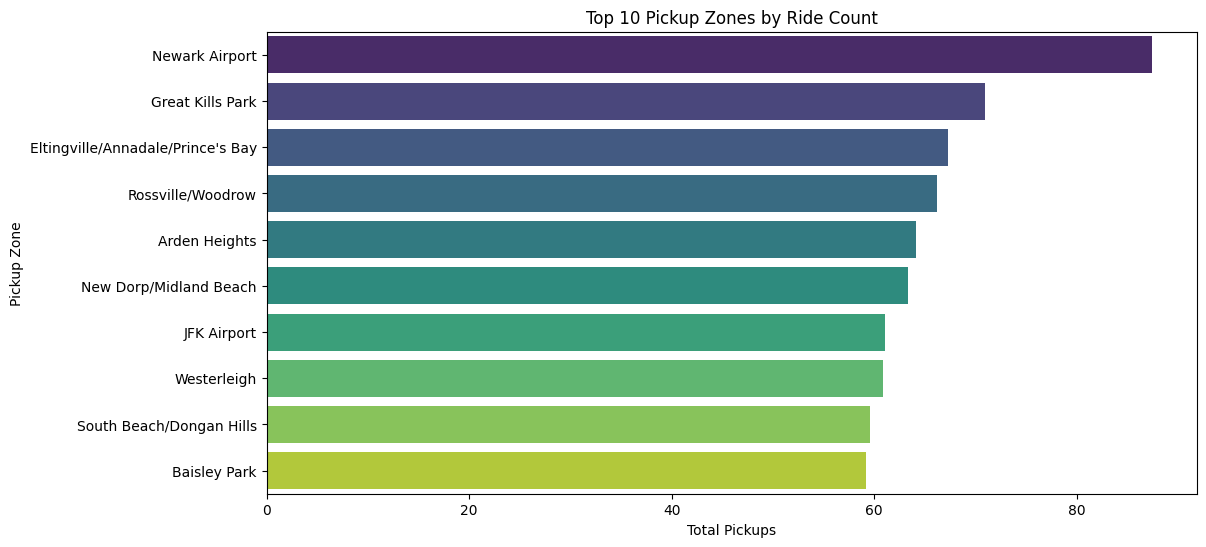

In [ ]:
# Highest average fare per ride
# Sort by total pickups
fare_pickup_analysis = pickup_analysis.sort_values(by='avg_fare', ascending=False)
print(fare_pickup_analysis.head(10))

# Plot top 10 pickup zones
top_fare_pickups_spots = fare_pickup_analysis.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_fare_pickups_spots, x='avg_fare', y='zone', palette='viridis')
plt.xlabel('Total Pickups')
plt.ylabel('Pickup Zone')
plt.title('Top 10 Pickup Zones by Ride Count')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
map_gdf.plot(
    column='total_rides',
    cmap='Oranges',
    legend=True,
    legend_kwds={'label': "Total Rides"},
    edgecolor='black'
)
plt.title('Ride Frequency by Pickup Zone')
plt.show()